<img src="RTs Competitive guided search.png" alt="Alternative text" />

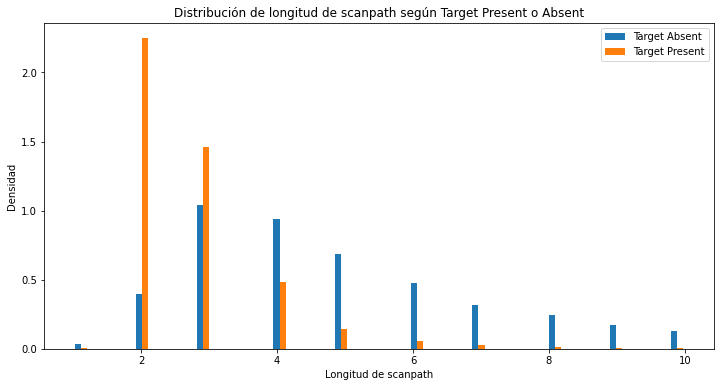

In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

tp_data = np.load(path.abspath("target_present_data.npz"))

tp_fixation_nums = tp_data["fixations"]
tp_labels = tp_data["labels"]


ta_data = np.load(path.abspath("target_absent_data.npz"))

ta_fixation_nums = ta_data["fixations"]
ta_labels = ta_data["labels"]


sequence_start_ta = np.where(ta_fixation_nums == 1)[0]
sequence_end_ta = np.append(sequence_start_ta[1:]-1,[ta_fixation_nums.shape[0]-1])


scanpaths_lengths_TA = ta_fixation_nums[sequence_end_ta]
scanpaths_lengths_TA = scanpaths_lengths_TA[scanpaths_lengths_TA <11]

sequence_start_tp = np.where(tp_fixation_nums == 1)[0]
sequence_end_tp = np.append(sequence_start_tp[1:]-1,[tp_fixation_nums.shape[0]-1])


scanpaths_lengths_TP = tp_fixation_nums[sequence_end_tp]
scanpaths_lengths_TP = scanpaths_lengths_TP[scanpaths_lengths_TP <11]



fig, ax = plt.subplots(1, 1, figsize = (12,6))

ax.set_title(f"Distribución de longitud de scanpath según Target Present o Absent")
ax.set_xlabel("Longitud de scanpath")
ax.set_ylabel("Densidad")
ax.hist([scanpaths_lengths_TA, scanpaths_lengths_TP], 40, label=['Target Absent', 'Target Present'],density=True)
ax.legend(loc='upper right');




In [2]:
#Enfoque que usaron en el paper: intentan predecir a qué bin corresponde cada simulación utilizando las ecuaciones que derivaron, pero ellos también usan esto para predecir si deben detener la búsqueda porque encontraron el target.
#Yo lo único que quiero es determinar cuando detener la búsqueda.
#Quiero un modelo que dada una longitud de scanpath, me diga qué probabilidad hay de que el target no se encuentre.


import pandas as pd


quantile_binned_ta = pd.qcut(pd.Series(ta_fixation_nums[sequence_end_ta]),[0.,0.3,0.7,1.],[0,1,2])
quantile_binned_tp = pd.qcut(pd.Series(tp_fixation_nums[sequence_end_tp]),[0.,0.3,0.7,1.],[3,4,5])



<AxesSubplot:title={'center':'584'}>

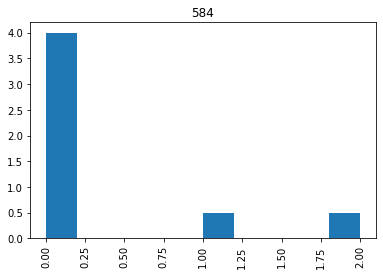

In [13]:
#plotear distribuciones de longitud de scanpath agrupado por imagen
#dividir en bines las longitudes de scanpath con cuantiles (lo que hice arriba), y plotear distribuciones de los bins agrupado por imagen, a ver si cada imagen cae en un mismo bin.

ta_image_ids = ta_data["image_ids"][sequence_end_ta]
tp_image_ids = tp_data["image_ids"][sequence_end_tp]

unique_image_ids_ta = np.unique(ta_image_ids)

#acá estoy ploteando histogramas correspondientes a una imagen a la vez
quantile_binned_ta[ta_image_ids == unique_image_ids_ta[4]].hist(ta_image_ids[ta_image_ids == unique_image_ids_ta[4]],density=True)

#Esto no me permite usar el enfoque 2 (que está en mi google docs) que había pensado anteriormente